In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

import re                                  
import string

from nltk.tokenize import word_tokenize

import pyarabic.araby as araby
from pyarabic.araby import tokenize, is_arabicrange, strip_tashkeel, strip_diacritics, strip_tatweel, strip_shadda
import arabicstopwords.arabicstopwords as stp
StopWords = stp.stopwords_list()

import qalsadi.lemmatizer
lemmer = qalsadi.lemmatizer.Lemmatizer()

import warnings
warnings.filterwarnings("ignore")

# bulid the pretrained model 

In [3]:
df = pd.read_csv('dataSets/arabic_reviews.csv')
df

,label,text
0,Positive,ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور...
1,Negative,كتاب حكم النبي محمد الذي كتبه الأديب الروائي ا...
2,Positive,معلومات تاريخية عن الثورة الإيرانية وما حدث في...
3,Negative,جلال أمين لم يجد إجابه للسؤال، فأخد يسرد لنا ق...
4,Positive,شقة ممتازة . أعجبني كل شيء وخاصة طاقم العمل..
...,...,...
66661,Negative,على الرغم من اعجابي الكبير للشاعر امل دنقل، ال...
66662,Negative,اختلف كثيرا مع فلسفة نيشية وبحث زرادشت عن الان...
66663,Positive,ممتاز لشباب ولكن يحتاج الى عوازل صوت . كل شي ج...
66664,Positive,لذيذ ولكن مطعم البسبور لذيذ جدا وطريقة تقديمهم...


In [4]:
df['label'] = df['label'].map({'Positive' : 1, 'Negative' : 0})
df.head(2)

,label,text
0,1,ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور...
1,0,كتاب حكم النبي محمد الذي كتبه الأديب الروائي ا...


# Text preprocessing 

In [109]:
lemmer = qalsadi.lemmatizer.Lemmatizer()
StopWords = stp.stopwords_list()


def preprocessing(Text):
    #remove spacial chars 
    Text = re.sub('[%s]' % re.escape("""؛!"#$%&'()*+,،-./:;«»<=>؟?@[\]^_`{|}~"""), ' ', Text)
    Text = re.sub(r'^RT[\s]+', '', Text)

    # remove hyperlinks
    Text = re.sub(r'https?://(?:www\.[^\s\n\r]+|[^\s\n\r]+)', '', Text)

    # remove hashtag (#)
    Text = re.sub(r'#', '', Text)
    
    #replaces newline (\n) and carriage return (\r) characters in a tweet with an empty string
    Text = re.sub(r'[\n\r]', '', Text)

    #remove double spaces 
    Text = Text.replace('  ',' ', )

    #remove numbers 
    Text = re.sub(r'\d+', '', Text)

    Text = araby.normalize_hamza(Text, method="tasheel")
    #remove stop words
    tokens = tokenize(Text, conditions=is_arabicrange, morphs=strip_tashkeel) 

    diacritics = [strip_diacritics(i) for i in tokens ]

    tatweel = [strip_tatweel(i) for i in diacritics ]

    shadda = [strip_shadda(i) for i in tatweel ]

    NoStopToken = [i for i in shadda if stp.is_stop(i) == False]
    Text = ' '.join(NoStopToken)
    
    #lemmatize
    Text = lemmer.lemmatize_text(Text)
    Text = ' '.join(Text)
    
    return Text

In [110]:
df['New_text'] = ''
for i in tqdm(range(len(df['text']))):
    df['New_text'][i] = preprocessing(df['text'][i])

100%|████████████████████████████████████████████████████████████████████████████| 66666/66666 [58:41<00:00, 18.93it/s]


In [111]:
df

,label,text,New_text
0,1,ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور...,ممتاز بوفيه مفتوح رايع سواء فطور او سحور تعامل...
1,0,كتاب حكم النبي محمد الذي كتبه الأديب الروائي ا...,كتاب حكم نبي محمد تب الاديب رواية روس لي توليس...
2,1,معلومات تاريخية عن الثورة الإيرانية وما حدث في...,معلوم تاريخ ثورة الايرانية حدث تفاصيل ممل معلو...
3,0,جلال أمين لم يجد إجابه للسؤال، فأخد يسرد لنا ق...,جلال امين وجد اجابه للسوال خدى سرد قصص تسوق اس...
4,1,شقة ممتازة . أعجبني كل شيء وخاصة طاقم العمل..,شق ممتاز اعجبني شيء خاصة طاقم عمل
...,...,...,...
66661,0,على الرغم من اعجابي الكبير للشاعر امل دنقل، ال...,رغم اعجابي كبير شاعر ملا دنقل ال اني عجب كفر ق...
66662,0,اختلف كثيرا مع فلسفة نيشية وبحث زرادشت عن الان...,اختلف كثير سفة نيشية بحث زرادشت الانسان متفوق ...
66663,1,ممتاز لشباب ولكن يحتاج الى عوازل صوت . كل شي ج...,ممتاز شباب احتاج الى عوازل صوت شي جميل أوجد عو...
66664,1,لذيذ ولكن مطعم البسبور لذيذ جدا وطريقة تقديمهم...,لذيذ مطعم البسبور لذيذ طريق تقديم طعام جميل اس...


In [112]:
df.to_csv('sen.csv')

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
FeatureText = vectorizer.fit_transform(df['New_text'])

In [117]:
vectorizer.get_feature_names_out()

array(['أبان', 'أبدى', 'أبر', ..., 'يولي', 'يوم', 'يونان'], dtype=object)

In [118]:
X = pd.DataFrame(FeatureText.toarray(),columns = vectorizer.get_feature_names_out())
Y = df['label']

X.head(5)

,أبان,أبدى,أبر,أبكى,أبهر,أتاح,أتبع,أتعب,أتم,أثار,...,يناير,يهم,يهود,يو,يوتوبيا,يود,يوسف,يولي,يوم,يونان
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.20, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((53332, 5000), (13334, 5000), (53332,), (13334,))

In [137]:
from sklearn.linear_model import LogisticRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [126]:
logi = LogisticRegression()
logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)
y_pred = y_pred.round()

print('The Train accuracy of the model : ', logi.score(X_train, y_train))
print('The Test accuracy of the model : ', round(accuracy_score(y_test, y_pred), 3))
print('The precision of the model : ', round(precision_score(y_test, y_pred), 3))
print('The recall of the model : ', round(recall_score(y_test, y_pred), 3))
print('The f1 score of the model : ', round(f1_score(y_test, y_pred), 3))
print('\nThe classification_report of the model :\n\n', classification_report(y_test, y_pred))

The Train accuracy of the model :  0.8706030150753769
The Test accuracy of the model :  0.848
The precision of the model :  0.842
The recall of the model :  0.854
The f1 score of the model :  0.848

The classification_report of the model :

               precision    recall  f1-score   support

           0       0.85      0.84      0.85      6716
           1       0.84      0.85      0.85      6618

    accuracy                           0.85     13334
   macro avg       0.85      0.85      0.85     13334
weighted avg       0.85      0.85      0.85     13334



In [142]:
#Sequential NN 
model = Sequential()

#the input, hidden, and output layers 
model.add(Dense(30, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ["accuracy"])

early_stop = EarlyStopping(monitor = 'val_loss', patience = 3, restore_best_weights = True)

DNN_epochs_hist = model.fit(X_train, y_train, epochs = 21, batch_size = 51, validation_split = 0.3, verbose=0, callbacks=[early_stop])

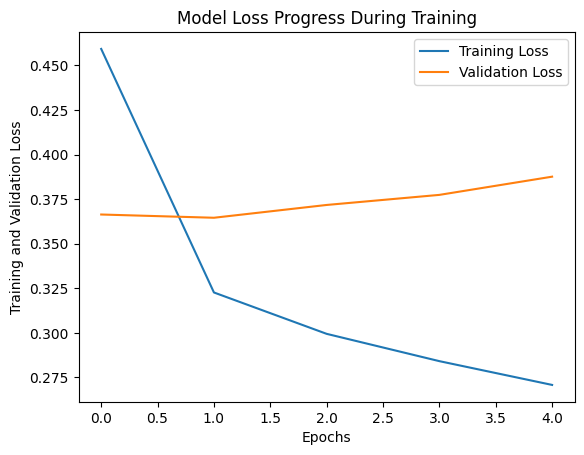

In [143]:
plt.plot(DNN_epochs_hist.history['loss'])
plt.plot(DNN_epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'])

In [148]:
DNN_epochs_hist.history['accuracy']

[0.8151719570159912,
 0.8609504103660583,
 0.8717454075813293,
 0.8783081769943237,
 0.884281575679779]

In [144]:
DNN_predict = model.predict(X_test) 

417/417 [==============================] - 1s 2ms/step


In [145]:
DNN_predict_Leb = [1 if i >.5 else 0 for i in DNN_predict ]

print('The accuracy of the model : ', round(accuracy_score(y_test, DNN_predict_Leb), 3))
print('The precision of the model : ', round(precision_score(y_test, DNN_predict_Leb), 3))
print('The recall of the model : ', round(recall_score(y_test, DNN_predict_Leb), 3))
print('The f1 score of the model : ', round(f1_score(y_test, DNN_predict_Leb), 3))
print('\nThe classification_report of the model :\n\n', classification_report(y_test, DNN_predict_Leb))

The accuracy of the model :  0.841
The precision of the model :  0.845
The recall of the model :  0.833
The f1 score of the model :  0.839

The classification_report of the model :

               precision    recall  f1-score   support

           0       0.84      0.85      0.84      6716
           1       0.84      0.83      0.84      6618

    accuracy                           0.84     13334
   macro avg       0.84      0.84      0.84     13334
weighted avg       0.84      0.84      0.84     13334



In [149]:
# Testing the model with a sentence i wrote 

In [150]:
good = preprocessing('المكان لطييييف و حلو جاز لي ')
good = pd.DataFrame(vectorizer.transform([good]).toarray(), columns= vectorizer.get_feature_names_out())

bad = preprocessing('المطعم سيء و الاكل بارد')
bad = pd.DataFrame(vectorizer.transform([bad]).toarray(), columns= vectorizer.get_feature_names_out())

In [153]:
model.predict(good) # more than 0.5 means positive 

1/1 [==============================] - 0s 48ms/step


array([[0.72046477]], dtype=float32)

In [154]:
model.predict(bad) # less than 0.5 means negitive 

1/1 [==============================] - 0s 40ms/step


array([[0.04767992]], dtype=float32)

# train the pretrained model on our data 

In [207]:
import emoji

In [231]:
reviews = pd.read_csv('dataSets/reviews.csv')
reviews

,Unnamed: 0,place_id,rating,review
0,0,ChIJx3GT6U69Nz4Rw3skTxH3mdc,5,طلبت لازانيا خضار لذيذة وسعرها ب ١٠ ريال
1,1,ChIJx3GT6U69Nz4Rw3skTxH3mdc,5,الاطباق متنوعه ولذييذه وسعرها مناسب ويسوى👍🏼👍🏼👍🏼
2,2,ChIJ8QasO-29Nz4RXM3q1Vk4LkM,5,افضل اكل صحي وقهوة يحبها قلبك
3,3,ChIJ8QasO-29Nz4RXM3q1Vk4LkM,5,نظيف ولذيذ\nكما ارجو زيادة أصناف الأكل والشرب .
4,4,ChIJ8QasO-29Nz4RXM3q1Vk4LkM,3,تحسها جايه من التسعينات
...,...,...,...,...
27086,30753,ChIJ5aCLZ64BLz4RHvN2lk7SD0c,5,مكان جميل ..
27087,30754,ChIJ5aCLZ64BLz4RHvN2lk7SD0c,5,أفضل كوفي بالشرررق🤍🤍🤍🤍🤍🤍
27088,30755,ChIJ5aCLZ64BLz4RHvN2lk7SD0c,5,خياااالي بشكل خياااالي
27089,30756,ChIJh_18mmMBLz4RD7HKlq6e3TY,5,المكان جميل ، هادي ، راقي .. الاسعار جدا مناسب...


In [209]:
reviews.drop(columns= 'Unnamed: 0', inplace =True) 

In [210]:
emojis = {
    "❤️" : "حب",
    "❤" : "حب",
    "💔" : "قلب حزين",
    "♥"  : "حب",
    "💜" : "حب",
    "💕" : "حب",
    "💙" : "حب",
    "💞" : "حب",
    "💗" : "حب",
    '🤍' : "حب",
    "💛" : "حب",
    '🖤' : 'قلب',
    '🤎' : 'قلب',
    '❤️' : 'قلب',
    '🧡' : 'قلب',
    "💓" : "حب", 
    "💋" : "حب",
    "♥️" : "حب",
    "❤︎" : "حب",
    "💖" : "حب",
    "❣" : "حب",
    "💘" : "حب",
    "❣️" : "حب", 
    "✌" : "منتصر",
    "✌🏼" : "منتصر",
    "✌🏻" : "منتصر", 
    '✌🏽' : "منتصر",
    "🙏" : "رجاء طلب",
    "🙏🏼" : "رجاء طلب",
    "🙏🏻" : "رجاء طلب",
    '🙏🏽' : "رجاء طلب",
    "👏🏼" : "تصفيق",
    "👏" : "تصفيق",
    "👏🏻" : "تصفيق",
    "💪" : "عضلات",
    "💪🏼" : "عضلات",
    "💪🏻" : "عضلات",
    "💪🏽" : "عضلات",   
    "👍" : "اعجاب",
    "👍🏻" : "اعجاب",
    '👍🏼' : 'ممتاز',
    '👍🏽' : 'ممتاز' ,
    "👎🏻" :"سيء",
    '👎🏼' : 'سيء',
    "👎" :"سيء",
    '👎🏾' : 'سيء', 
    '🫶' : 'قلب',
    '🫶🏻' : 'قلب',
    '🫶🏼' : 'قلب',
    '🫶🏽' : 'حب',  
    '🫰' : 'قلب',
    '🫰🏼' : 'قلب',
    '🫰🏻' : 'قلب',
    "👌🏻" : "بالظبط",
    "👌🏼" : "بالظبط",
    "👌" : "بالظبط",
    "👌🏽" : "بالظبط",
    "👊" : "لكمة",
    "👊🏼" : "لكمة",
    "👊🏽" : "لكمة",
    "✋🏻" : "توقف",
    "✋🏼" : "توقف",
    '✋' : 'توقف',
    '🤏' : 'صغير او قليل',
    '🤏🏼' : 'صغير او قليل',
    '🤏🏻' : 'صغير او قليل',
    '🤏🏽' : 'صغير او قليل', 
    "👐🏽" : "ايدي مفتوحه",
    "👐" : "ايدي مفتوحه",
    '🤲🏽' : "ايدي مفتوحه",
    '🤲🏻' : "ايدي مفتوحه", 
    '🤲' : 'دعاء', 
    '🤲🏼' : 'دعاء', 
    '🤝🏼' : 'اتفاق',
    '🤝🏻' : 'اتفاق',
    "✍🏻" : "يكتب",
    '✍️' : 'يكتب',
    '🤙' : 'رائع',
    '🤙🏼' : 'رائع',
    '🤙🏻' : 'رائع', 
    "🙌" : "دعاء",
    '🙌🏼' : 'دعاء',
    '🙌🏻' : 'دعاء',
    "👋" : "تلويح",
    '👋🏻' : 'تلويح', 
    '👋🏼' : 'تلويح', 
    "✊" : "يد مغلقه", 
    "👆" : "اعلى",
    '👆🏻' : 'اعلى', 
    "👇" : "لاسفل",
    '👇🏼' : "لاسفل",
    '👇🏻' : 'لاسفل', 
    "👈" : "لليمين",
    '☝️' : 'واحد',
    '☝🏻' : 'واحد',
    '🤞' : 'كذب', 
    '🤞🏻' : 'كذب',
    '🖖' : 'رائع', 
    '🖖🏻' : 'رائع', 
    '🤌' : 'انتظر', 
    '🤌🏻' : 'انتظر', 
    '🤳' : 'تصوير', 
    '💅' : 'انيق', 
    '💅🏻' : 'انيق', 
    '🫵' : 'انت', 
    '🫵🏻' : 'انت', 


    
    "🙂":"يبتسم",
    "😂":"يضحك",
    "😍":"حب",
    "😭":"يبكي",
    "😢":"حزن",
    "😔":"حزن",
    "😅":"يضحك",
    "🙁":"حزين",
    "😞":"حزين",
    "😊":"سعادة",
    "😴":"ينام",
    "😀":"يضحك",
    "😌":"حزين",
    "🌹":"وردة",
    "🙈":"خجل",
    "😄":"يضحك",
    "😐":"محايد",
    "✨":"نجمه",
    "🤔":"تفكير",
    "😏":"يستهزء",
    "😒":"يستهزء",
    "🙄":"ملل",
    "😕":"عصبية",
    "😃":"يضحك",
    "🌸":"وردة",
    "😓":"حزن",
    "😑":"منزعج",
    "💭":"تفكير",
    "😎":"ثقة",
    "😩":"متعب",
    "😳":"مصدوم",
    "🎶":"موسيقي",
    "🌚":"صمت",
    "💚":"حب",
    "🍃":"سلام",
    "☺":"يضحك",
    "🐸":"ضفدع",
    "😶":"مصدوم",
    "😉":"غمزة",
    "🌷":"حب",
    "🙃":"مصدوم",
    "😫":"حزين",
    "😨":"مصدوم",
    "🎼 ":"موسيقي",
    "🍁":"مرح",
    "🍂":"مرح",
    "💟":"حب",
    "😪":"حزن",
    "😆":"يضحك",
    "😣":"استياء",
    "☺️":"حب",
    "😱":"كارثة",
    "😁":"يضحك",
    "😖":"استياء",
    "🏃🏼":"يجري",
    "😡":"غضب",
    "🚶":"يسير",
    "🤕":"مرض",
    "‼️":"تعجب",
    "🕊":"طائر",
    '🙊':"مصدوم",
    "💃":"سعادة مرح",
    "💃🏼":"سعادة مرح",
    "😜":"مرح",
    "😟":"استياء",
    "😥":"احراج",
    "🎻":"موسيقي",
    "✒":"يكتب",
    "🚶🏻":"يسير",
    "💎":"الماظ",
    "😷":"وباء مرض",
    "☝":"واحد",
    "🚬":"تدخين",
    "💐" : "ورد",
    "🌞" : "شمس",
    "⚠️" :"تحذير",
    "🤗" : "احتواء",
    "✖️": "غلط",
    "📍"  : "مكان",
    "👸" : "ملكه",
    "👑" : "تاج",
    "✔️" : "صح",
    "💌": "قلب رسالة",
    "😲" : "مندهش",
    "💦": "ماء",
    "🚫" : "ممنوع",
    "🏊" :"يسبح",
    "⭕️" :"دائره كبيره",
    "🎷" : "ساكسفون",
    "🌝":"مبتسم",
    "➿"  : "عقده مزدوجه",
    "📩":  "تواصل معي",
    "☕️": "قهوه",
    "😧" : "قلق و صدمة",
    "🗨": "رسالة",   
    "❗️" :"تعجب",
    "🙆🏻": "اشاره موافقه",
    "👯" :"اخوات",
    "©" :  "رمز",
    "👵🏽" :"سيده عجوزه",
    "🐣": "كتكوت",  
    "🙇": "شخص ينحني",
    "⁉️" : "استنكار",
    "⚽️": "كوره",
    "🕶" :"حب",
    "🎈" :"بالون",    
    "🎀":    "ورده",
    "💵":  "فلوس",   
    "😋":  "جائع",
    "😛":  "يغيظ",
    "😠":  "غاضب",
    "🌾":  "ارز",
    "👣":  "اثر قدمين",
    "❌":"رفض",
    "🍟":"طعام",
    "👬":"صداقة",
    "🐰":"ارنب",
    "☂":"مطر",
    "⚜":"مملكة فرنسا",
    "🐑":"خروف",
    "🗣":"صوت مرتفع",
    "☘":"مرح",
    "😮":"صدمة",
    "😦":"قلق",
    "⭕":"الحق",
    "✏️":"قلم",
    "ℹ":"معلومات",
    "🙍🏻":"رفض",
    "⚪️":"نضارة نقاء",
    "🐤":"حزن",
    "💫":"مرح",
    "💝":"حب",
    "🍔":"طعام",
    "✈️":"سفر",
    "🏃🏻‍♀️":"يسير",
    "🍳":"ذكر",
    "🎤":"مايك غناء",
    "🎾":"كره",
    "🐔":"دجاجة",
    "🙋":"سؤال",
    "📮":"بحر",
    "💉":"دواء",
    "💂🏿 ":"حارس",
    "🎬":"سينما",
    "♦️":"مرح",
    "💡":"قكرة",
    "‼":"تعجب",
    "👼":"طفل",
    "🔑":"مفتاح",
    "🕋":"كعبة",
    "🐓":"دجاجة",
    "💩":"معترض",
    "👽":"فضائي",
    "☔️":"مطر",
    "🍷":"عصير",
    "🌟":"نجمة",
    "☁️":"سحب",
    "👃":"انف",
    "🌺":"مرح",
    "🔪":"سكينة",
    "♨":"سخونية",
    "✏":"قلم",
    "🚶🏾‍♀️":"يسير",
    "◾️":"وقف",
    "😚":"حب",
    "🔸":"مرح",
    "😙":"سعيد",
    "🎥":"تصوير",
    "👉":"يمين",
    "👏🏽":"يصفق",
    "🏴":"اسود",
    "🔥":"حريق",  
    "😬":"عدم الراحة",   
    "👊🏿":"يضرب",    
    "🌿":"ورقه شجره",     
    "☠️":"سام",     
    "🎉":"يهنئ",      
    "🔕" :"صامت",
    "😿":"وجه حزين",      
    "☹️":"حزن",     
    "😘" :"حب",     
    "😰" :"خوف و حزن",
    "🌼":"ورده",      
    "🎧":"سماعات",
    "📝":"يكتب",      
    "😇":"لطيف",      
    "😈":"شيطان",      
    "🏃":"يجري",      
    "🔫":"مسدس",      
    "❗️":"تعجب",
    "🔐":"قفل",    
    "🚶🏽":"يمشي",    
    "😯":"متفاجى", 
    "😻":"اعجاب",    
    "🙉" :"قرد",    
    "👧":"طفله صغيره",     
    "🔴":"دائره حمراء",  
    "💤":"نوم",     
    "👀":"ينظر",  
    "❄️":"تلج",
    "💀":"جمجمة",   
    "😤":"غاضب",      
    "🖋":"قلم",      
    "🎩":"قبعة",      
    "☕️":"قهوه",     
    "😹":"ضحك",     
    "☄️ ":"نار",     
    "👻":"رعب",
    "❎":"خطا",
    "🤮":"قرف",
     '🔹' : 'معين ازرق',
     '🤤' : 'لذيذ',
     '🥙' : 'ساندوتش',
     '⭐' : 'نجمة',
     '🥐' : 'كرواسون',
     '🍽️' : 'طبق',
     '🍽' : 'طبق',
     '🍤' : 'شرمب',
     '🍲' : 'طعام',
     '🌮' : 'تاكو',
     '🤣' : 'يضحك',
     '🥭' : 'مانجو',
     '➖' : 'طرح',
     '➕' : 'زائد',
     '🇵🇭' : 'رمز',
     '💯' : 'كامل',
     '🌤' : 'جو',
     '🥲': 'دمعه',
     '🤑': 'مال',
     '🥰': 'محبوب',
     '🌶': 'فلفل',
     '🤭': 'خجل',
     '⚠': 'خطر',
     '🤢': 'غثيان',
     '💶': 'مال',
     '☕': 'قهوة',
     '🏠': 'منزل',
     '🍖': 'لحم',
     '📌': 'موقع',
     '🍰': 'كيك',
     '🥺': 'حزن',
     '✅': 'صحيح',
     '🇸🇦': 'السعودية',
     '🫡': 'احترام',
     '🥹': 'حزن و دموع',
     '🥳': 'احتفال',
     '🌯': 'ساندوتش',
     '♀️': 'انثى',
     '🤦': 'يأس' ,
     '🤦🏻': 'يأس' ,
     '🧐': 'تحقيق' ,
     '👦': 'صبي' ,
     '👨': 'رجل' ,
     '👩': 'امراة' ,
     '⏱': 'وقت' ,
    '🎊' : 'احتفال',
    '🤝' : 'اتفاق',
    '🌭' : 'نقانق',
    '🍕' : 'بيتزا',
    '🌶️' : 'فلفل',
    '🤨' : 'تشكيك',
    '🙏🏾' : 'طلب',
    '👩🏻' : 'امراة',
    '🍳' : 'بيض',
    '🤯' : 'مذهل',
    '♣️' : 'رمز',
    '🛑' : 'دائرة حمراء',
    '✔' : 'صح',
    '🥗' : 'سلطة',
    '❗' : 'تعجب',
    '🥘' : 'رز',
    '🗿' : 'تمثال',
    '☹' : 'حزن',
    '💰' : 'مال',
    '🔥' : 'نار',
    '🦦' : 'سنجاب نائم',
    '🤓' : 'ذكي',
    '🔘' : 'دائرة',
    '🫑' : 'فلفل',
    '🤩' : 'اعجاب',
    '🏧' : 'صرافة',
    '🍗' : 'دجاج',
    '🏆' : 'جائزة',
    '🍚' : 'طعام',
    '🐟' : 'سمك',
    '🍜' : 'نودلز',
    '🥔' : 'بطاطا',
    '🥩' : 'لحم',
    '🍱' : 'طعام اسيوي',
    '🥢' : 'عيدان الطعام',
    '♂️' : 'رجل',
    '🤷🏼' : 'محتار',
    '🤷' : 'محتار',
    '🧀' : 'جبن',
    '🫀' : 'قلب',
    '🫤' : 'محتار',
    '☑️' : 'صح',
    '☑' : 'صح',
    '🆒' : 'رائع',
    '🅿️' : 'مواقف',
    '🍡' : 'حلوى',
    '📢' : 'مكبر صوت',
    '🎼' : 'موسيقى',
    '⛔' : 'ممنوع',
    '🍢' : 'حلوى',
    '🚻' : 'دورة المياه',
    '🔈' : 'مكبر صوت',
    '🚾' : 'دورة المياه',
    '🫣' : 'خجل',
    '🤷🏻' : 'حيرة',
    '🐜' : 'نمل',
    '🥴' : 'تعب',
    '🧋' : 'مشروب',
    '⬇️' : 'اسفل',
    '⬇' : 'اسف',
    '👍🏿' : 'اعجاب',
    '👅': 'لسان', 
    '🥚': 'بيض',
    '🔝': 'الاول',
    '🧁': 'كيك',
    '🍦': 'كيك',
    '🍉': 'بطيخ',
    '☀️': 'شمس',
    '☀': 'شمس',
    '🌻': 'زهرة',
    '🫐': 'توت',
    '🍞': 'خبز',
    '🍓': 'فراولة',
    '👏🏾': 'تصفيق',
    '🥇': 'الاول',
    '🥸': 'رجل',
    '🫠': 'يذوب',
    '🥶': 'برد',
    '🤬': 'غضب',
    '💼': 'حقيبة عمل',
    '🦀' : 'سرطعون', 
    '🩹' : 'لصقة جروح', 
    '💸' : 'مال', 
    '🍪' : 'كعك', 
    '😵' : 'الم', 
    '💫' : 'نجم', 
    '🫖' : 'ابريق', 
    '🥀' : 'ورده ذابله', 
    '👍🏾' : 'ممتاز', 
    '🥟' : 'فطيرة', 
    '🫔' : 'فطيرة', 
    '🍆' : 'باذنجان', 
    '🧆' : 'طعام', 
    '🥞' : 'كعك', 
    '🚗' : 'سيارة', 
    '☘️' : 'برسيم', 
    '💴' : 'مال', 
    '👌🏾' : 'موافق', 
    '🏖️' : 'شاطى', 
    '🏖' : 'شاطى', 
    '🍴' : 'شوكة و سكين', 
    '🥓' : 'طعام', 
    '🏅' : 'ميدالية', 
    '🔖' : 'زينة', 
    '🎟️' : 'تذكرة', 
    '🎟' : 'تكرة', 
    '🚨' : 'انذار', 
    '🎂' : 'كيك', 
    '⚽' : 'كورة', 
    '🥣' : 'وعاء', 
    '💥' : 'العاب نارية', 
    '🐞' : 'حشرة', 
    '🌱' : 'نبته', 
    '🎁' : 'هدية', 
    '🚩' : 'خطر', 
    '🫶🏾' : 'حب', 
    '🤷' : 'حيرة', 
    '🏀' : 'كورة', 
    '🍩' : 'دونات', 
    '🫢' : 'صدمه', 
    '🎹' : 'بيانو', 
    '🧊' : 'ثلج', 
    '🏃🏻' : 'يركض', 
    '👎🏽' : 'سيء', 
    '🤦🏽' : 'مستاء', 
    '💨' : 'ريح', 
    '😮' : 'متفاجى', 
    '💧' : 'ماء', 
    '♦' : 'شكل', 
    '♨️' : 'ساخم', 
    '🏘' : 'منزل', 
    '🧴' : 'بلسم', 
    '👨🏻' : 'رجل', 
    '💁' : 'يتحدث', 
    '💁🏻' : 'يتحدث', 
    '🧻' : 'مناديل', 
    '🧼' : 'صابون', 
    '🎙️' : 'ميكرفون', 
    '🎙' : 'ميكرفون', 
    '🚽' : 'دورة مياه', 
    '🫦' : 'شفاه', 
    '🫶🏿' : 'حب', 
    '👾' : 'وحش', 
    '👺' : 'وحش',
    '👹' : 'وحش',
    '🤖' : 'وحش',
    '🚘' : 'سيارة', 
    '🕰️' : 'ساعة', 
    '🕰' : 'ساعة', 
    '🙋🏾' : 'تحية', 
    '🚼' : 'طفل', 
    '♿' : 'ذوي الاحتياجات', 
    '👫' : 'عائلة', 
    '🍵' : 'شاي', 
    '📚' : 'كتاب', 
    '🟩' : 'مربع', 
    '🙆' : 'احترام', 
    '🙆🏻' : 'احترام', 
    '🍒' : 'كرز', 
    '🍏' : 'تفاحة', 
    '🥝' : 'كيوي', 
    '🍋' : 'ليمون', 
    '🍐' : 'كمثرى', 
    '🍎' : 'تفاح', 
    '🍊' : 'برتقال', 
    '🍅' : 'طماطم', 
    '😗' : 'يعرف شيء ما', 
    '🙍' : 'رجل', 
    '🙍🏻' : 'رجل', 
    '☔' : 'مطر', 
    '🤫' : 'اصمت', 
    '🥖' : 'خبز', 
    '😝' : 'سعيد', 
    '🎵' : 'موسيقى', 
    '📸' : 'صورة', 
    '🥵' : 'حار', 
    '🤐' : 'صمت',
    '🤧' : 'مرض',
    '👶' : 'طفل',
    '👶🏻' : 'طفل',
    }
    
emoticons_to_emoji = {
    ":)" : "🙂",
    ":(" : "🙁",
    "xD" : "😆",
    ":=(": "😭",
    ":'(": "😢",
    ":'‑(": "😢",
    "XD" : "😂",
    ":D" : "🙂",
    "♬" : "موسيقي",
    "♡" : "❤",
    "☻"  : "🙂",
    }

In [211]:
def checkemojie(text):
    emojistext=[]
    for char in text:
        if any(emoji.distinct_emoji_list(char)) and char in emojis.keys():
            emojistext.append(emojis[emoji.distinct_emoji_list(char)[0]])
    return " ".join(emojistext)
    
def emojiTextTransform(text):
    cleantext=re.sub(r'[^\w\s]','',text)
    return cleantext+" "+checkemojie(text)

In [212]:
emojiTextTransform(reviews['review'][1])

'الاطباق متنوعه ولذييذه وسعرها مناسب ويسوى اعجاب اعجاب اعجاب'

In [213]:
reviews['New_review'] = ''
for i in tqdm(range(len(reviews['review']))):
    reviews['New_review'][i] = emojiTextTransform(reviews['review'][i])

100%|██████████████████████████████████████████████████████████████████████████| 27091/27091 [00:11<00:00, 2386.94it/s]


In [214]:
reviews

,place_id,rating,review,New_review
0,ChIJx3GT6U69Nz4Rw3skTxH3mdc,5,طلبت لازانيا خضار لذيذة وسعرها ب ١٠ ريال,طلبت لازانيا خضار لذيذة وسعرها ب ١٠ ريال
1,ChIJx3GT6U69Nz4Rw3skTxH3mdc,5,الاطباق متنوعه ولذييذه وسعرها مناسب ويسوى👍🏼👍🏼👍🏼,الاطباق متنوعه ولذييذه وسعرها مناسب ويسوى اعجا...
2,ChIJ8QasO-29Nz4RXM3q1Vk4LkM,5,افضل اكل صحي وقهوة يحبها قلبك,افضل اكل صحي وقهوة يحبها قلبك
3,ChIJ8QasO-29Nz4RXM3q1Vk4LkM,5,نظيف ولذيذ\nكما ارجو زيادة أصناف الأكل والشرب .,نظيف ولذيذ\nكما ارجو زيادة أصناف الأكل والشرب
4,ChIJ8QasO-29Nz4RXM3q1Vk4LkM,3,تحسها جايه من التسعينات,تحسها جايه من التسعينات
...,...,...,...,...
27086,ChIJ5aCLZ64BLz4RHvN2lk7SD0c,5,مكان جميل ..,مكان جميل
27087,ChIJ5aCLZ64BLz4RHvN2lk7SD0c,5,أفضل كوفي بالشرررق🤍🤍🤍🤍🤍🤍,أفضل كوفي بالشرررق حب حب حب حب حب حب
27088,ChIJ5aCLZ64BLz4RHvN2lk7SD0c,5,خياااالي بشكل خياااالي,خياااالي بشكل خياااالي
27089,ChIJh_18mmMBLz4RD7HKlq6e3TY,5,المكان جميل ، هادي ، راقي .. الاسعار جدا مناسب...,المكان جميل هادي راقي الاسعار جدا مناسبه ا...


In [217]:
reviews['final_review'] = ''
for i in tqdm(range(len(reviews['New_review']))):
    reviews['final_review'][i] = preprocessing(reviews['New_review'][i])

100%|████████████████████████████████████████████████████████████████████████████| 27091/27091 [06:49<00:00, 66.14it/s]


In [218]:
reviews

,place_id,rating,review,New_review,final_review
0,ChIJx3GT6U69Nz4Rw3skTxH3mdc,5,طلبت لازانيا خضار لذيذة وسعرها ب ١٠ ريال,طلبت لازانيا خضار لذيذة وسعرها ب ١٠ ريال,طلب لازانيا خضار لذيذ سعر ريال
1,ChIJx3GT6U69Nz4Rw3skTxH3mdc,5,الاطباق متنوعه ولذييذه وسعرها مناسب ويسوى👍🏼👍🏼👍🏼,الاطباق متنوعه ولذييذه وسعرها مناسب ويسوى اعجا...,الاطباق متنوع ولذييذه سعر مناسب سوى اعجاب اعجا...
2,ChIJ8QasO-29Nz4RXM3q1Vk4LkM,5,افضل اكل صحي وقهوة يحبها قلبك,افضل اكل صحي وقهوة يحبها قلبك,فضل كلى صحة قهوة أحب قلب
3,ChIJ8QasO-29Nz4RXM3q1Vk4LkM,5,نظيف ولذيذ\nكما ارجو زيادة أصناف الأكل والشرب .,نظيف ولذيذ\nكما ارجو زيادة أصناف الأكل والشرب,نظيف لذيذ ارجو زيادة اصناف الاكل شرب
4,ChIJ8QasO-29Nz4RXM3q1Vk4LkM,3,تحسها جايه من التسعينات,تحسها جايه من التسعينات,حسى جاي تسعين
...,...,...,...,...,...
27086,ChIJ5aCLZ64BLz4RHvN2lk7SD0c,5,مكان جميل ..,مكان جميل,مكان جميل
27087,ChIJ5aCLZ64BLz4RHvN2lk7SD0c,5,أفضل كوفي بالشرررق🤍🤍🤍🤍🤍🤍,أفضل كوفي بالشرررق حب حب حب حب حب حب,فضل كوفة بالشرررق حب حب حب حب حب حب
27088,ChIJ5aCLZ64BLz4RHvN2lk7SD0c,5,خياااالي بشكل خياااالي,خياااالي بشكل خياااالي,خياااالي شكل خياااالي
27089,ChIJh_18mmMBLz4RD7HKlq6e3TY,5,المكان جميل ، هادي ، راقي .. الاسعار جدا مناسب...,المكان جميل هادي راقي الاسعار جدا مناسبه ا...,مكان جميل هاد راقي الاسعار مناسب تعامل راقي قص...


In [219]:
revDF = pd.DataFrame(vectorizer.transform(reviews['final_review']).toarray(), columns= vectorizer.get_feature_names_out())
predctions = model.predict(revDF)
Fixed_predctions = [1 if i >.5 else 0 for i in predctions ]

847/847 [==============================] - 1s 2ms/step


In [221]:
reviews['predction'] = Fixed_predctions # 1 posi, 0 negi
reviews

,place_id,rating,review,New_review,final_review,predction
0,ChIJx3GT6U69Nz4Rw3skTxH3mdc,5,طلبت لازانيا خضار لذيذة وسعرها ب ١٠ ريال,طلبت لازانيا خضار لذيذة وسعرها ب ١٠ ريال,طلب لازانيا خضار لذيذ سعر ريال,1
1,ChIJx3GT6U69Nz4Rw3skTxH3mdc,5,الاطباق متنوعه ولذييذه وسعرها مناسب ويسوى👍🏼👍🏼👍🏼,الاطباق متنوعه ولذييذه وسعرها مناسب ويسوى اعجا...,الاطباق متنوع ولذييذه سعر مناسب سوى اعجاب اعجا...,0
2,ChIJ8QasO-29Nz4RXM3q1Vk4LkM,5,افضل اكل صحي وقهوة يحبها قلبك,افضل اكل صحي وقهوة يحبها قلبك,فضل كلى صحة قهوة أحب قلب,0
3,ChIJ8QasO-29Nz4RXM3q1Vk4LkM,5,نظيف ولذيذ\nكما ارجو زيادة أصناف الأكل والشرب .,نظيف ولذيذ\nكما ارجو زيادة أصناف الأكل والشرب,نظيف لذيذ ارجو زيادة اصناف الاكل شرب,1
4,ChIJ8QasO-29Nz4RXM3q1Vk4LkM,3,تحسها جايه من التسعينات,تحسها جايه من التسعينات,حسى جاي تسعين,0
...,...,...,...,...,...,...
27086,ChIJ5aCLZ64BLz4RHvN2lk7SD0c,5,مكان جميل ..,مكان جميل,مكان جميل,1
27087,ChIJ5aCLZ64BLz4RHvN2lk7SD0c,5,أفضل كوفي بالشرررق🤍🤍🤍🤍🤍🤍,أفضل كوفي بالشرررق حب حب حب حب حب حب,فضل كوفة بالشرررق حب حب حب حب حب حب,1
27088,ChIJ5aCLZ64BLz4RHvN2lk7SD0c,5,خياااالي بشكل خياااالي,خياااالي بشكل خياااالي,خياااالي شكل خياااالي,0
27089,ChIJh_18mmMBLz4RD7HKlq6e3TY,5,المكان جميل ، هادي ، راقي .. الاسعار جدا مناسب...,المكان جميل هادي راقي الاسعار جدا مناسبه ا...,مكان جميل هاد راقي الاسعار مناسب تعامل راقي قص...,1


In [222]:
reviews.head(20)

,place_id,rating,review,New_review,final_review,predction
0,ChIJx3GT6U69Nz4Rw3skTxH3mdc,5,طلبت لازانيا خضار لذيذة وسعرها ب ١٠ ريال,طلبت لازانيا خضار لذيذة وسعرها ب ١٠ ريال,طلب لازانيا خضار لذيذ سعر ريال,1
1,ChIJx3GT6U69Nz4Rw3skTxH3mdc,5,الاطباق متنوعه ولذييذه وسعرها مناسب ويسوى👍🏼👍🏼👍🏼,الاطباق متنوعه ولذييذه وسعرها مناسب ويسوى اعجا...,الاطباق متنوع ولذييذه سعر مناسب سوى اعجاب اعجا...,0
2,ChIJ8QasO-29Nz4RXM3q1Vk4LkM,5,افضل اكل صحي وقهوة يحبها قلبك,افضل اكل صحي وقهوة يحبها قلبك,فضل كلى صحة قهوة أحب قلب,0
3,ChIJ8QasO-29Nz4RXM3q1Vk4LkM,5,نظيف ولذيذ\nكما ارجو زيادة أصناف الأكل والشرب .,نظيف ولذيذ\nكما ارجو زيادة أصناف الأكل والشرب,نظيف لذيذ ارجو زيادة اصناف الاكل شرب,1
4,ChIJ8QasO-29Nz4RXM3q1Vk4LkM,3,تحسها جايه من التسعينات,تحسها جايه من التسعينات,حسى جاي تسعين,0
5,ChIJ8QasO-29Nz4RXM3q1Vk4LkM,3,مخابز طازجة لذيذة. القهوة أقل من المتوسط,مخابز طازجة لذيذة القهوة أقل من المتوسط,مخابز طازج لذيذ قهوة قلا متوسط,0
6,ChIJ8QasO-29Nz4RXM3q1Vk4LkM,5,الموظف رائع,الموظف رائع,موظف رايع,1
7,ChIJv_iF-EeWNz4RkDNwWwuspQs,1,الأكل عادي مقبول\nبطئ جدا\nالتعامل سئ مع العميل,الأكل عادي مقبول\nبطئ جدا\nالتعامل سئ مع العميل,الاكل عاد مقبولبطي جداالتعامل سي عميل,0
8,ChIJv_iF-EeWNz4RkDNwWwuspQs,4,المكان والديكور جميل لكن المشاوي جربته ماعجبني...,المكان والديكور جميل لكن المشاوي جربته ماعجبني...,مكان ديكور جميل مشاوي جرب ماعجبني اماباقي الاك...,1
9,ChIJv_iF-EeWNz4RkDNwWwuspQs,5,ممتاز فيه اكلات مميزه والعدس عندهم حكاية,ممتاز فيه اكلات مميزه والعدس عندهم حكاية,ممتاز اكلات مميز عدس حكاية,1


In [223]:
reviews.to_csv('labeled_reviews.csv')

In [236]:
labeled = pd.read_csv('labeled_reviews.csv')

In [239]:
group_data = labeled.groupby(['place_id', 'predction'])['predction'].sum()
group_data

place_id                     predction
ChIJ--MZZAqrLz4RJfeHcYRCPNs  0            0
                             1            7
ChIJ-05fH6sDNj4Rms6kOHbtx4U  0            0
                             1            3
ChIJ-0INYZWXNz4Rp7bIxYzVVCM  0            0
                                         ..
ChIJzz9NE_egNT4R6L2OiCHVuVw  1            3
ChIJzzAnyij9Lj4RQ1eAC-cEdn8  0            0
                             1            3
ChIJzzKTo-AONT4R90kazH64DJA  0            0
                             1            8
Name: predction, Length: 7678, dtype: int64

In [265]:
finalReviewes = pd.DataFrame(columns = ['place_id', 'isLoved'])

for i in range(0, len(group_data), 2): 
    
    if group_data.values[i] > group_data.values[i+1]:
        isLoved = 0
    else : 
        isLoved = 1
    
    finalReviewes.loc[len(finalReviewes)] = [group_data.index[i][0], isLoved]

finalReviewes

,place_id,isLoved
0,ChIJ--MZZAqrLz4RJfeHcYRCPNs,1
1,ChIJ-05fH6sDNj4Rms6kOHbtx4U,1
2,ChIJ-0INYZWXNz4Rp7bIxYzVVCM,1
3,ChIJ-0gnlBvjLj4RWTO-lNgaX7U,1
4,ChIJ-0hAvL91Lz4Rk-r3Y2NlcI0,1
...,...,...
3834,ChIJzy_SPZqUNz4RoOGzCmTf7FQ,1
3835,ChIJzyb_Vi0FLz4RS-hfXLLvjEk,1
3836,ChIJzz9NE_egNT4R6L2OiCHVuVw,1
3837,ChIJzzAnyij9Lj4RQ1eAC-cEdn8,1


In [266]:
finalReviewes['isLoved'].value_counts()

isLoved
1    2081
0    1758
Name: count, dtype: int64

In [291]:
reviews

,Unnamed: 0,place_id,rating,review
0,0,ChIJx3GT6U69Nz4Rw3skTxH3mdc,5,طلبت لازانيا خضار لذيذة وسعرها ب ١٠ ريال
1,1,ChIJx3GT6U69Nz4Rw3skTxH3mdc,5,الاطباق متنوعه ولذييذه وسعرها مناسب ويسوى👍🏼👍🏼👍🏼
2,2,ChIJ8QasO-29Nz4RXM3q1Vk4LkM,5,افضل اكل صحي وقهوة يحبها قلبك
3,3,ChIJ8QasO-29Nz4RXM3q1Vk4LkM,5,نظيف ولذيذ\nكما ارجو زيادة أصناف الأكل والشرب .
4,4,ChIJ8QasO-29Nz4RXM3q1Vk4LkM,3,تحسها جايه من التسعينات
...,...,...,...,...
27086,30753,ChIJ5aCLZ64BLz4RHvN2lk7SD0c,5,مكان جميل ..
27087,30754,ChIJ5aCLZ64BLz4RHvN2lk7SD0c,5,أفضل كوفي بالشرررق🤍🤍🤍🤍🤍🤍
27088,30755,ChIJ5aCLZ64BLz4RHvN2lk7SD0c,5,خياااالي بشكل خياااالي
27089,30756,ChIJh_18mmMBLz4RD7HKlq6e3TY,5,المكان جميل ، هادي ، راقي .. الاسعار جدا مناسب...


In [282]:
finalReviewes['rated1'], finalReviewes['rated2'], finalReviewes['rated3'] = 0, 0, 0
finalReviewes['rated4'], finalReviewes['rated5'] = 0, 0

In [313]:
for i in range(len(finalReviewes)):

    df = reviews[reviews['place_id'] == finalReviewes["place_id"][i]]
    
    finalReviewes.loc[i, 'rated1'] = len(df[df['rating'] == 1])
    finalReviewes.loc[i, 'rated2'] = len(df[df['rating'] == 2])
    finalReviewes.loc[i, 'rated3'] = len(df[df['rating'] == 3])
    finalReviewes.loc[i, 'rated4'] = len(df[df['rating'] == 4])
    finalReviewes.loc[i, 'rated5'] = len(df[df['rating'] == 5])

finalReviewes

,place_id,isLoved,rated1,rated2,rated3,rated4,rated5
0,ChIJ--MZZAqrLz4RJfeHcYRCPNs,1,2.0,0.0,0.0,1.0,6.0
1,ChIJ-05fH6sDNj4Rms6kOHbtx4U,1,3.0,2.0,1.0,0.0,0.0
2,ChIJ-0INYZWXNz4Rp7bIxYzVVCM,1,2.0,0.0,0.0,3.0,1.0
3,ChIJ-0gnlBvjLj4RWTO-lNgaX7U,1,2.0,0.0,2.0,1.0,3.0
4,ChIJ-0hAvL91Lz4Rk-r3Y2NlcI0,1,2.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...
3834,ChIJzy_SPZqUNz4RoOGzCmTf7FQ,1,2.0,0.0,0.0,2.0,4.0
3835,ChIJzyb_Vi0FLz4RS-hfXLLvjEk,1,3.0,0.0,1.0,0.0,3.0
3836,ChIJzz9NE_egNT4R6L2OiCHVuVw,1,0.0,1.0,0.0,1.0,4.0
3837,ChIJzzAnyij9Lj4RQ1eAC-cEdn8,1,1.0,1.0,2.0,0.0,2.0


In [316]:
col = ['rated1', 'rated2', 'rated3', 'rated4', 'rated5']
for i in col:
    finalReviewes[i] = finalReviewes[i].astype('int32')

finalReviewes

,place_id,isLoved,rated1,rated2,rated3,rated4,rated5
0,ChIJ--MZZAqrLz4RJfeHcYRCPNs,1,2,0,0,1,6
1,ChIJ-05fH6sDNj4Rms6kOHbtx4U,1,3,2,1,0,0
2,ChIJ-0INYZWXNz4Rp7bIxYzVVCM,1,2,0,0,3,1
3,ChIJ-0gnlBvjLj4RWTO-lNgaX7U,1,2,0,2,1,3
4,ChIJ-0hAvL91Lz4Rk-r3Y2NlcI0,1,2,0,0,0,2
...,...,...,...,...,...,...,...
3834,ChIJzy_SPZqUNz4RoOGzCmTf7FQ,1,2,0,0,2,4
3835,ChIJzyb_Vi0FLz4RS-hfXLLvjEk,1,3,0,1,0,3
3836,ChIJzz9NE_egNT4R6L2OiCHVuVw,1,0,1,0,1,4
3837,ChIJzzAnyij9Lj4RQ1eAC-cEdn8,1,1,1,2,0,2


In [318]:
finalReviewes.to_csv('labeled_reviews.csv')